In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA 

EXAMPLE 3.1:	An ARMA process for the NAO

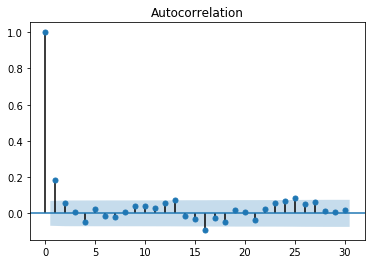

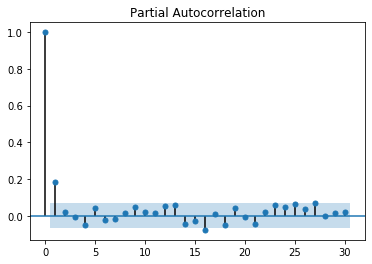

     lag        AC          Q       PAC      Prob(>Q)
0    1.0  0.185759  28.226330  0.185759  1.079264e-07
1    2.0  0.054692  30.676206  0.020908  2.181456e-07
2    3.0  0.005914  30.704888 -0.008203  9.807815e-07
3    4.0 -0.047194  32.533523 -0.049711  1.488148e-06
4    5.0  0.024427  33.024010  0.043681  3.722343e-06
5    6.0 -0.014486  33.196725 -0.023760  9.610310e-06
6    7.0 -0.020252  33.534716 -0.016662  2.104400e-05
7    8.0  0.009114  33.603257  0.015058  4.793115e-05
8    9.0  0.043169  35.142782  0.045822  5.622493e-05
9   10.0  0.041604  36.574482  0.022543  6.703080e-05
10  11.0  0.032020  37.423576  0.016646  9.783421e-05
11  12.0  0.058572  40.268316  0.051605  6.489407e-05


D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [5]:
def get_pdq(time_series):
    plot_acf(time_series)
    plot_pacf(time_series)
    plt.show()

    r,rac,Q = sm.tsa.acf(time_series, qstat=True)
    prac = pacf(time_series,method='ywmle')
    table_data = np.c_[range(1,len(r)), r[1:],rac,prac[1:len(rac)+1],Q]
    table = pd.DataFrame(table_data, columns=['lag', "AC","Q", "PAC", "Prob(>Q)"])
    table=table[0:12]
    
    print(table)



series=pd.read_csv('./nao.csv')

get_pdq(series)

EXAMPLE 3.3:	Modelling the sunspot number

In [18]:
def ts_arma(ts, p, q):
    arma = ARMA(ts, order=(p, q)).fit(disp = -1)
    ts_predict_arma = arma.predict()
    return ts_predict_arma

def AIC(k,ts,predict):
    n=len(ts)
    predict=np.array(predict).reshape(len(series),1)
    sse=np.sum((predict-ts)**2)
    L=-(n/2)*math.log(2*math.pi)-(n/2)*math.log(sse/n)-n/2
    return round((2*k-2*L)/n,3)

def BIC(k,ts,predict):
    n=len(ts)
    predict=np.array(predict).reshape(len(series),1)
    sse=np.sum((predict-ts)**2)
    L=-(n/2)*math.log(2*math.pi)-(n/2)*math.log(sse/n)-n/2
    
    return round((-2*L + math.log(n)*k )/n,3)

series=pd.read_csv('./sunspot.csv')
# pred=np.array(ts_arma(series,9,0)).reshape(len(series),1)

print('k aic bic')
for i in range(1,13):
    pred=ts_arma(series,i,0)
    aic=AIC(i,series,pred)
    bic=BIC(i,series,pred)
    print(i,aic,bic)
# print(pred.shape,series.shape)

k aic bic
1 10.003 10.015
2 9.362 9.385
3 9.347 9.382
4 9.353 9.4
5 9.359 9.418
6 9.348 9.419
7 9.313 9.396
8 9.272 9.367
9 9.229 9.336
10 9.235 9.354
11 9.241 9.372
12 9.248 9.39


EXAMPLE 4.1 Modeling the United Kingdom Spread as an Integrated
Process

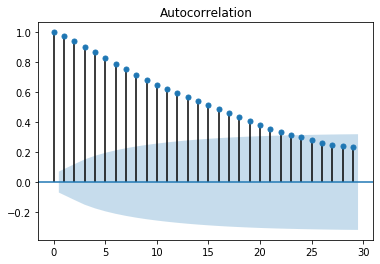

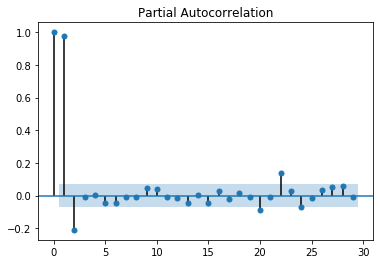

D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


     lag        AC            Q       PAC       Prob(>Q)
0    1.0  0.974009   747.574135  0.974009  1.351677e-164
1    2.0  0.938443  1442.436245 -0.199786   0.000000e+00
2    3.0  0.901588  2084.612405 -0.009852   0.000000e+00
3    4.0  0.865619  2677.329334  0.001526   0.000000e+00
4    5.0  0.828795  3221.385409 -0.043934   0.000000e+00
5    6.0  0.790488  3716.946567 -0.043138   0.000000e+00
6    7.0  0.752218  4166.263262 -0.010208   0.000000e+00
7    8.0  0.714703  4572.402556 -0.009081   0.000000e+00
8    9.0  0.680767  4941.363345  0.044864   0.000000e+00
9   10.0  0.651025  5279.224665  0.041250   0.000000e+00
10  11.0  0.623137  5589.159204 -0.006994   0.000000e+00
11  12.0  0.595732  5872.799056 -0.015457   0.000000e+00
     lag        AC          Q       PAC      Prob(>Q)
0    1.0  0.210131  34.750304  0.210131  3.748202e-09
1    2.0  0.026692  35.311714 -0.018270  2.148616e-08
2    3.0 -0.019718  35.618496 -0.022595  9.016464e-08
3    4.0  0.015263  35.802535  0.025738  3.

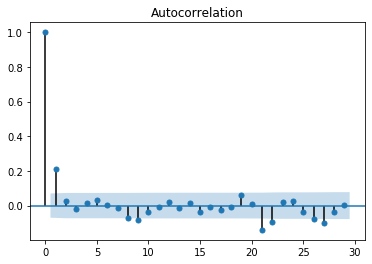

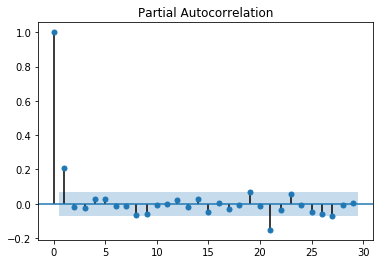

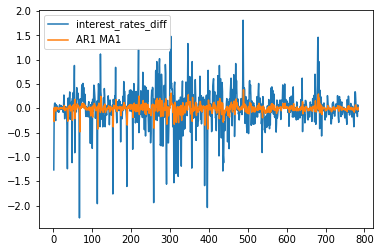

In [115]:
#  一阶差分
def ts_diff(ts):
    return ts.diff(1).dropna()
#  自然对数
def ts_log(ts):
    return np.log(ts)

series=pd.read_csv('./interest_rates.csv')
get_pdq(series)
diff=ts_diff(series)
get_pdq(diff)

ar1ma1=ts_arma(diff,1,1)
plt.plot(diff)
plt.plot(ar1ma1)
plt.legend(['interest_rates_diff','AR1 MA1'])

EXAMPLE 5.1:	Unit root tests on the spread and the $/£ exchange rate

In [76]:
def uni_root(ts):
    re=sm.tsa.stattools.adfuller(ts)
    print(re[4],'\n','result:',re[0],' p-value:',re[1])

series=pd.read_csv('./interest_rates.csv')
uni_root(series)

{'1%': -3.4387291412780177, '5%': -2.8652383048736056, '10%': -2.568739332674375} 
 result: -3.915468726967863  p-value: 0.0019239095802702103


EXAMPLE 5.10 Is There Long Memory in the S&P 500 Stock Market Index

order: [0.9296875]
     lag        AC             Q       PAC  Prob(>Q)
0    1.0  0.419505   3001.590118  0.419505       0.0
1    2.0  0.324740   4800.355434  0.180525       0.0
2    3.0  0.329350   6650.656781  0.178109       0.0
3    4.0  0.317569   8371.058938  0.131471       0.0
4    5.0  0.366817  10666.558227  0.186518       0.0
5    6.0  0.343742  12682.457030  0.109204       0.0
6    7.0  0.330586  14547.115707  0.094400       0.0
7    8.0  0.325357  16353.361447  0.079814       0.0
8    9.0  0.330423  18216.397093  0.085632       0.0
9   10.0  0.318329  19945.655629  0.054014       0.0
10  11.0  0.335096  21861.983746  0.082833       0.0
11  12.0  0.339889  23833.640400  0.075951       0.0
     lag        AC             Q       PAC  Prob(>Q)
0    1.0  0.594029   6018.557143  0.594029       0.0
1    2.0  0.559323  11354.710556  0.319029       0.0
2    3.0  0.547321  16464.607636  0.226322       0.0
3    4.0  0.540143  21441.652640  0.175136       0.0
4    5.0  0.553236  26663.2

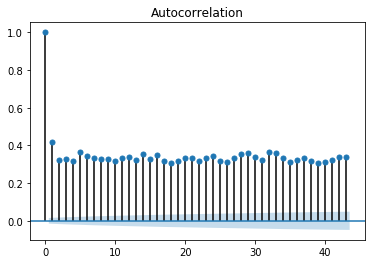

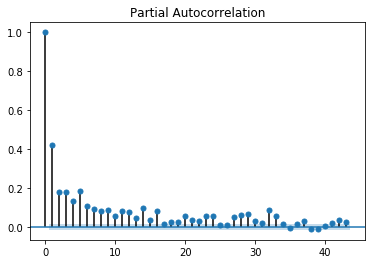

D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


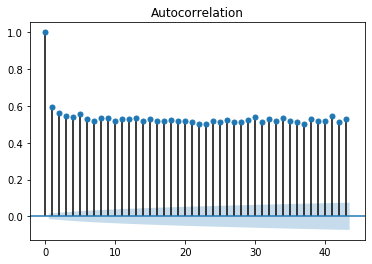

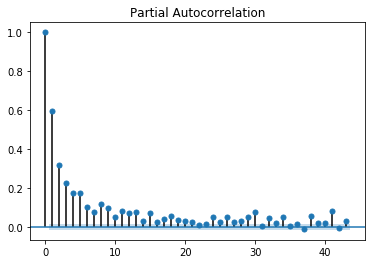

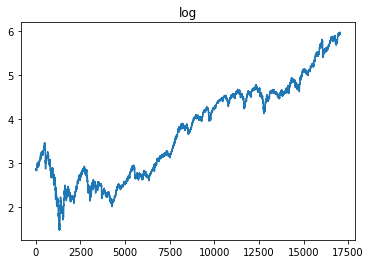

Text(0.5, 1.0, 'Fractionally differenced')

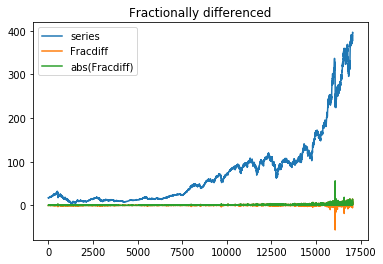

In [57]:
from fracdiff import Fracdiff
from fracdiff import StationaryFracdiff


series=pd.read_csv('./sandp500.csv')
log_scale=ts_log(series)


# fracdiff
statfracdiff = StationaryFracdiff()
statfracdiff.fit(series)
order=statfracdiff.order_
print('order:',order)
fracdiff = Fracdiff(order)
series_diff = fracdiff.transform(series)
# series_diff = statfracdiff.transform(series)
series_diff=np.nan_to_num(series_diff)
series_diff_abs=abs(series_diff)
get_pdq(series_diff)
get_pdq(series_diff_abs)

plt.plot(log_scale)
plt.title('log')
plt.show()
plt.plot(series)
plt.plot(series_diff)
plt.plot(series_diff_abs)
plt.legend(['series','Fracdiff','abs(Fracdiff)'])
plt.title('Fractionally differenced')


EXAMPLE 7.1:	ARIMA forecasting of the spread

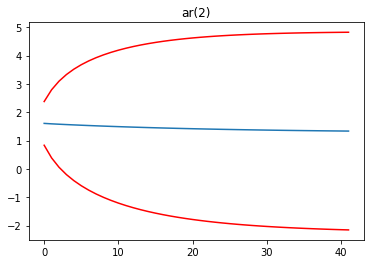

Text(0.5, 1.0, 'arima(0,1,1)')

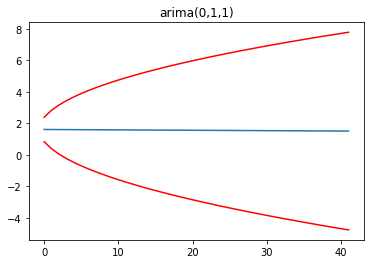

In [104]:

def ts_arima(ts,p,d,q):
    ed=len(ts)
    mdl = ARIMA(ts,(p,d,q))
    arima=mdl.fit(disp=0)
    # ts_predict_arima = arima.predict(start=ed,end=ed+42)
    ts_predict_arima =arima.forecast(42)
    return ts_predict_arima

series=pd.read_csv('./interest_rates.csv')

ar2=ts_arima(series,2,0,0)
plt.plot(ar2[0])
plt.plot(ar2[2],color='r')
plt.title('ar(2)')
plt.show()
arima011=ts_arima(series,1,1,1)
plt.plot(arima011[0])
plt.plot(arima011[2],color='r')
plt.title('arima(0,1,1)')

EXAMPLE 7.2: 	Forecasting global temperatures


Text(0.5, 1.0, 'global_temps')

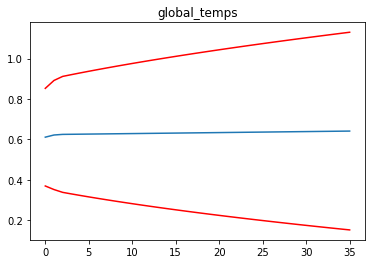

In [107]:
def ts_arima(ts,p,d,q):
    mdl = ARIMA(ts,(p,d,q))
    arima=mdl.fit(disp=0)
    # ts_predict_arima = arima.predict(start=ed,end=ed+42)
    ts_predict_arima =arima.forecast(36)
    return ts_predict_arima

series=pd.read_csv('./global_temps.csv')
arima=ts_arima(series,0,1,3)
plt.plot(arima[0])
plt.plot(arima[2],color='r')
plt.title('global_temps')

EXAMPLE 8.1:	Beveridge-Nelson decomposition of the All Share index

Text(0.5, 1.0, 'ftse forecast')

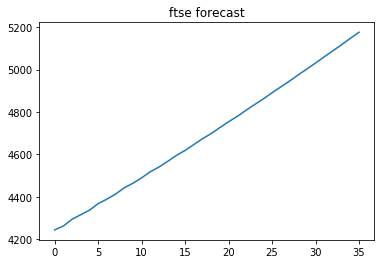

In [111]:
def ts_log_rvs(ts):
    return np.exp(ts)
  
def ts_diff_rvs(ts):
    return np.cumsum(ts)

series=pd.read_csv('./ftse.csv')
log=ts_log(series)
arima=ts_arima(log,2,1,2)
rvs=ts_log_rvs(arima[0])

plt.plot(rvs)
plt.title('ftse forecast')


EXAMPLE 8.2: 	Fitting H-P trends to global temperatures

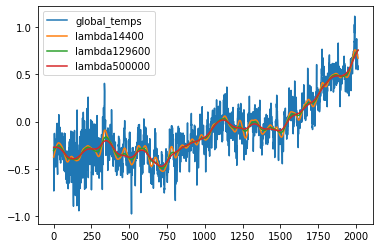

In [113]:
def hp(ts, lamb=10):
    def D_matrix(N):
        D = np.zeros((N-1,N))
        D[:,1:] = np.eye(N-1)
        D[:,:-1] -= np.eye(N-1)
        return D
    N = len(ts)
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    D = D2 @ D1
    g = np.linalg.inv((np.eye(N)+lamb*D.T@D))@ ts
    return g


series=pd.read_csv('./global_temps.csv')
hp14400=hp(series,14400)
hp129600=hp(series,129600)
hp500000=hp(series,500000)
plt.plot(series)
plt.plot(hp14400)
plt.plot(hp129600)
plt.plot(hp500000)
plt.legend(['global_temps','lambda14400','lambda129600','lambda500000'])


EXAMPLE 9.2:	Seasonal ARIMA modelling of beer sales

Results of Dickey-Fuller Test:
Test Statistic                 -2.076718
p-value                         0.253979
#Lags Used                     10.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64
     lag        AC           Q       PAC      Prob(>Q)
0    1.0 -0.541714   23.487940 -0.541714  1.256993e-06
1    2.0 -0.034936   23.586935 -0.464784  7.553744e-06
2    3.0  0.438552   39.396823  0.287139  1.430180e-08
3    4.0 -0.638626   73.381936 -0.397242  4.380789e-15
4    5.0  0.271845   79.625415 -0.340993  1.005113e-15
5    6.0  0.082548   80.209232 -0.276882  3.234407e-15
6    7.0 -0.261920   86.170758 -0.032819  7.548138e-16
7    8.0  0.350795   97.019422  0.005936  1.733638e-17
8    9.0 -0.121253   98.334628  0.006842  3.415899e-17
9   10.0 -0.075764   98.855781 -0.008987  9.231304e-17
10  11.0  0.253156  104.762544  0.303942  2.026437e-17
11  12.

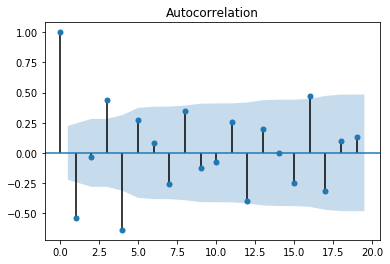

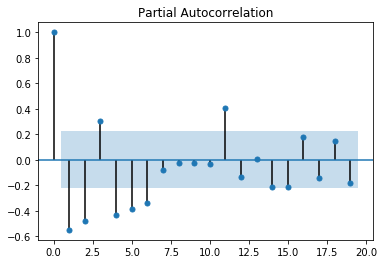

D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


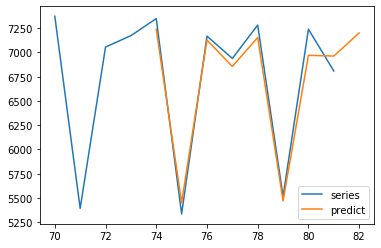

In [125]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
series=pd.read_csv('./beer.csv')
diff1=ts_diff(series)
seasonal=diff1-diff1.shift(4)
seasonal=seasonal.dropna(inplace=False)
test_stationarity(seasonal)
get_pdq(seasonal)
mdl = sm.tsa.statespace.SARIMAX(series[:-12], trend='n', order=(0,1,1), seasonal_order=(0,1,4,4))
results = mdl.fit()
ed=len(series)
pred=results.predict(start = ed-8, end= ed, dynamic= True)  
plt.plot(series[-12:])
plt.plot(pred)
plt.legend(['series','predict'])

EXAMPLE 9.3:	Forecasting global temperatures using exponential smoothing

D:\software\Programming\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


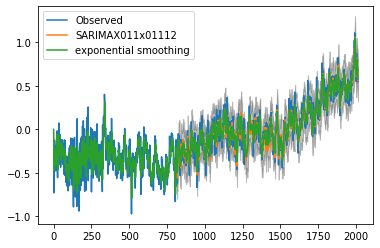

In [147]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

series=pd.read_csv('./global_temps.csv')
ses=SimpleExpSmoothing(series).fit()
mdl=sm.tsa.statespace.SARIMAX(series, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
results=mdl.fit()

ed=len(series)
pred=arima011.predict(start = 1, end= ed,dynamic=False)
# pred=ts_diff_rvs(pred)
fitted=list(ses.fittedvalues)

pred_dynamic = results.get_prediction(start=ed-1200, dynamic=False, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
 
ax = series.plot()
pred_dynamic.predicted_mean.plot(ax=ax)
 
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
 
# ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), data.index[-1],
#                  alpha=.1, zorder=-1)
 

plt.plot(fitted)
plt.legend(['Observed','SARIMAX011x01112','exponential smoothing'])
plt.show()

EXAMPLE 10.1:	GARCH models for the $/£ exchange rate

D:\software\Programming\anaconda\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001046. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
D:\software\Programming\anaconda\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


Iteration:      1,   Func. Count:      7,   Neg. LLF: -35197.37243231351
Iteration:      2,   Func. Count:     23,   Neg. LLF: -35197.97479352151
Iteration:      3,   Func. Count:     40,   Neg. LLF: -15209.446728868385
Iteration:      4,   Func. Count:     57,   Neg. LLF: -14722.190585580538
Iteration:      5,   Func. Count:     71,   Neg. LLF: -33787.79410579846
Iteration:      6,   Func. Count:     88,   Neg. LLF: 45560.946718669366
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 45560.94722885948
            Iterations: 6
            Function evaluations: 88
            Gradient evaluations: 6
                           AR - GARCH Model Results                           
Dep. Variable:                 2.3359   R-squared:                     -40.365
Mean Model:                        AR   Adj. R-squared:                -40.369
Vol Model:                      GARCH   Log-Likelihood:               -45560.9
Distribution:                  Normal 

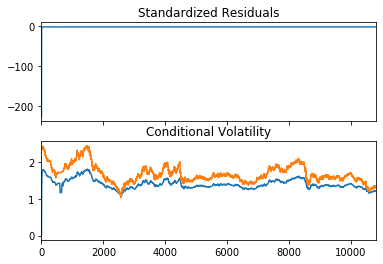

In [152]:
from arch import arch_model
series=pd.read_csv('./dollar.csv')
#AR(1)-GARCH(1,1)
am = arch_model(series, mean='ARX', lags=1, vol='garch')
res = am.fit()
print(res.summary())
res.plot()
plt.plot(series)

EXAMPLE 17.3:	State space modelling of global temperatures

In [164]:
import scipy
def expsmooth(y,h):
  
    n=len(y)
    a,p=np.zeros(n),np.zeros(n)
    a[0]=y[0];p[0]=10000
  
    k,v=np.zeros(n),np.zeros(n)
    v[0]=0
  
  
    def fmsoe(param):
        sigmae=abs(param[0]);sigmau=abs(param[1])
        z=w=1
        co=0
        likelihood=0
        for t in range(1,n):
            k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
            p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau
            v[t]=y[t]-z*a[t-1]
            a[t]=co+w*a[t-1]+k[t]*v[t]
            likelihood=likelihood+.5*math.log(2*math.pi)+.5*math.log(z**2*p[t-1]+sigmae)+.5*(v[[t]]**2/(z**2*p[t-1]+sigmae)) 
  
        return likelihood
  
    result=scipy.optimize.minimize(fun=fmsoe,x0=[
        np.random.random(1),np.random.random(1)])
  
    sigmae=abs(result.x[0])
    sigmau=abs(result.x[1])
  
    Forecast=np.zeros(h)
    z=w=1;co=0
    for t in range(1,n):
        k[t]=(z*w*p[t-1])/(z**2*p[t-1]+sigmae)
        p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+sigmau
        v[t]=y[t]-z*a[t-1]
        a[t]=co+w*a[t-1]+k[t]*v[t]

    Forecast[0]=a[-1]
    if(h>0):
        for i in range(1,h):
            Forecast[i]=co+Forecast[i-1]

    return Forecast



series=pd.read_csv('./global_temps.csv')

print(expsmooth(series.values,3))
      


[0.58080533 0.58080533 0.58080533]
